In [1]:
import pandas as pd

In [3]:
from py4mac.ml.metrics.classification import plot_roc_curve, select_best_threshold, plot_confusion_matrix

ModuleNotFoundError: No module named 'py4mac'

In [17]:
!cd ../../ && ls

1-supervised_vs_unsupervised.ipynb  3-evaluation-metrics.ipynb	projects
2-cross_validation.ipynb	    data			py4mac
3-classification-metrics.ipynb	    networkxx.ipynb		train.csv


In [3]:
from projects.mnist.src.config import TRAINING_FILE,MODEL_OUTPUT
from projects.mnist.src.model_dispatcher import models

In [7]:
model = "rf"
fold = 0
df = pd.read_csv(f"{TRAINING_FILE}")

df_train = df[df.kfold != fold].reset_index(drop=True)

df_valid = df[df.kfold == fold].reset_index(drop=True)

x_train = df_train.drop("label", axis=1).values
y_train = df_train.label.values

x_valid = df_valid.drop("label", axis=1).values
y_valid = df_valid.label.values


clf = models[model]
clf.fit(x_train, y_train)

preds = clf.predict(x_valid)

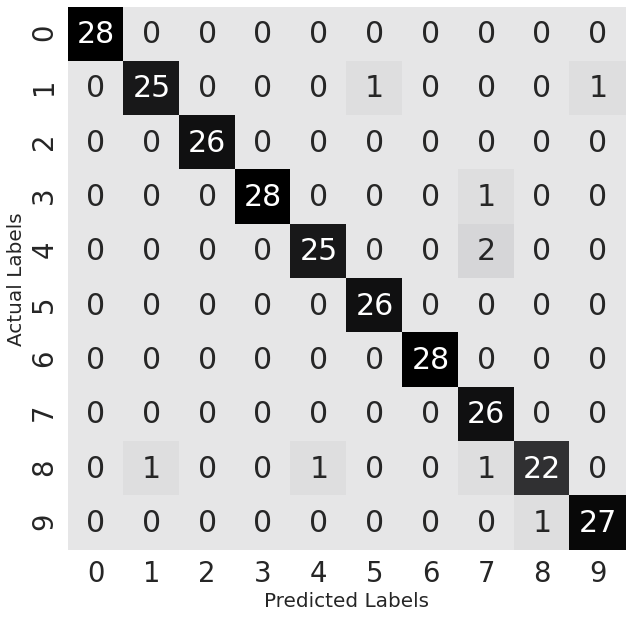

In [8]:
plot_confusion_matrix(y_valid, preds)